## Preprocessing

In [ ]:
import numpy as np
import os
import sklearn
import matplotlib.pyplot as plt
import mglearn

In [ ]:
# I had to delete some sort of .DS_store file in order to load the data
import glob, os

for root, dirs, files in os.walk('C:/Users/flori/Desktop/Anaconda Scripts/Research Workshop/spectrograms'):
    i = 0
    for file in files:
        if file.endswith('.DS_Store'):
            path = os.path.join(root, file)

            print("Deleting: %s" % (path))

            if os.remove(path):
                print("Unable to delete!")
            else:
                print("Deleted...")
                i += 1

print("Files Deleted: %d" % (i))

Files Deleted: 0


Length of files list: 17406
the name of the spectrogram is XC417157_0.npy, and a snippet of the spectrogram: 
[[-15.061161 -16.400705 -20.7006   ... -23.372297 -23.444263 -15.061161]
 [-17.214073 -17.748749 -21.192902 ... -21.753685 -22.591593 -17.214073]
 [-30.129364 -22.24649  -22.994774 ... -21.044544 -22.378132 -30.129364]
 ...
 [-58.11909  -49.542355 -49.914993 ... -48.125767 -42.745728 -58.11909 ]
 [-50.303753 -50.67199  -54.173656 ... -50.382275 -42.65883  -50.303753]
 [-49.10507  -52.72721  -59.92421  ... -51.071125 -42.726166 -49.10507 ]]
the shape of spectrogram 1 = (224, 224)


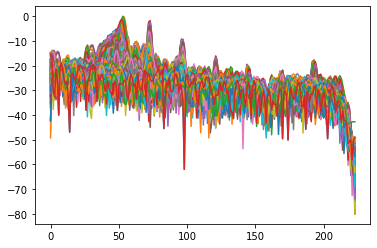

In [ ]:
# the path to all spectrograms
path_data_all = os.path.normpath('C:/Users/flori/Desktop/Anaconda Scripts/Research Workshop/spectrograms')

# all spectrograms, ordered on species
all_species = os.listdir(path_data_all)
all_species.sort()

all_files = [] # list of all files, in tuple form, sorted by file; (file name, file path, species name, target value of species)
i = 0 # target value per species
for species in all_species:
    species_path = os.path.join(path_data_all, species) 
    species_files = os.listdir(species_path)
    for file in species_files:
        file_path = os.path.join(species_path, file)
        all_files.append((file, file_path, species, i))
    i += 1

print(f"Length of files list: {len(all_files)}")

# example -> loading the first spectrogram
spectrogram1 = np.load(all_files[0][1])
print(f"the name of the spectrogram is {all_files[0][0]}, and a snippet of the spectrogram: \n{spectrogram1}")
print(f"the shape of spectrogram 1 = {spectrogram1.shape}")
plt.figure()
plt.plot(spectrogram1)
plt.show()

In [ ]:
# putting all of the spectrograms together into 1 3D array
# don't know whether the shape of this is correct 
# print(len(all_files))
all_specs = np.zeros((len(all_files), 224, 224))
all_targets = np.zeros((len(all_files))) # bird species

for i in range(len(all_files)):
    spec = np.load(all_files[i][1])
    all_specs[i,:224,:224] = spec
    all_targets[i] = all_files[i][3]

# JUST FOR NOW
spec17000 = np.load(all_files[17000][1])
all_specs[17000,:224,:224] = spec17000
all_targets[17000]= all_files[17000][3]

# cropping the spectrograms which will cut off the upper 'unnecessary' part
cropped_specs = all_specs[:, :150, :]
cropped_targets = all_targets

the shape of the array with the cropped spectrograms is: (17406, 150, 224)


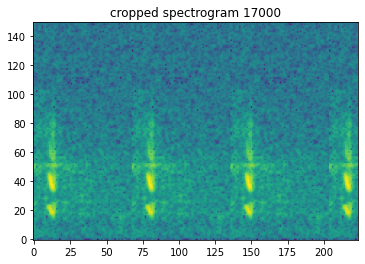

the shape of the array with the uncropped spectrograms is: (17406, 224, 224)


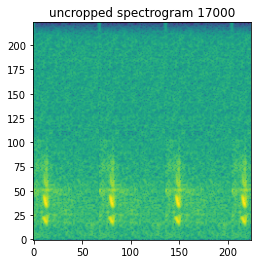

In [ ]:
# example with spectrogram number 17,000
print(f"the shape of the array with the cropped spectrograms is: {cropped_specs.shape}")
plt.figure()
plt.imshow(cropped_specs[17000], origin='lower')
plt.title("cropped spectrogram 17000")
plt.show()

print(f"the shape of the array with the uncropped spectrograms is: {all_specs.shape}")
plt.figure()
plt.imshow(all_specs[17000], origin='lower')
plt.title("uncropped spectrogram 17000")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import utils

# defining the ratios in which the data will be split
train_ratio = 0.80
test_ratio = 0.10
validation_ratio = 0.10

# determining our X and y
X = cropped_specs
y = cropped_targets

# shuffling data: X and y shuffle in unison so we don't have to worry about X not matching y
X, y = utils.shuffle(X, y)

# reshaping data
X = X.reshape(X.shape[0], -1)
y = y.reshape(y.shape[0], -1)


## Training and Testing Data

#### K-Nearest Neighbors Classifier

In [ ]:
"""
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
num_neighbors = [1,3,5,7]

for neighbors in num_neighbors:
    fp = open("CV_scores_KNN.txt", "a")
    kNN_dict = cross_validate(KNeighborsClassifier(n_neighbors = neighbors, weights = 'distance'), X, y.ravel(), cv = 3, n_jobs = 3, return_train_score = True)
    fp.write(f"KNN with {neighbors} neighbors:\n{kNN_dict}\n")
    del kNN_dict
    fp.close()
"""  

'\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.model_selection import cross_validate\nnum_neighbors = [1,3,5,7]\n\nfor neighbors in num_neighbors:\n    fp = open("CV_scores_KNN.txt", "a")\n    kNN_dict = cross_validate(KNeighborsClassifier(n_neighbors = neighbors, weights = \'distance\'), X, y.ravel(), cv = 3, n_jobs = 3, return_train_score = True)\n    fp.write(f"KNN with {neighbors} neighbors:\n{kNN_dict}\n")\n    del kNN_dict\n    fp.close()\n'

In [ ]:
"""
#to get the name of the species: all_species[i] where i is the binary classifier

#so we should end up with one logreg variable here from the previous code block

print("Coefficient shape: ", logreg.coef_.shape)
print("Intercept shape: ", logreg.intercept_.shape)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

for coef, intercept, color in zip(logreg.coef_, logreg.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

#plt.ylim(-10, 15)
#plt.xlim(0, 20)
plt.xlabel("Feature 2") #whatever this should be
plt.ylabel("Feature 1") #whatever this should be
plt.legend(all_species)
"""

'\n#to get the name of the species: all_species[i] where i is the binary classifier\n\n#so we should end up with one logreg variable here from the previous code block\n\nprint("Coefficient shape: ", logreg.coef_.shape)\nprint("Intercept shape: ", logreg.intercept_.shape)\n\nmglearn.discrete_scatter(X[:, 0], X[:, 1], y)\n\nfor coef, intercept, color in zip(logreg.coef_, logreg.intercept_, [\'b\', \'r\', \'g\']):\n    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)\n\n#plt.ylim(-10, 15)\n#plt.xlim(0, 20)\nplt.xlabel("Feature 2") #whatever this should be\nplt.ylabel("Feature 1") #whatever this should be\nplt.legend(all_species)\n'

In [ ]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_ratio/(train_ratio+test_ratio))
del X
del y
del cropped_specs
del cropped_targets
del all_targets
del all_specs

#### K-Nearest Neighbors Classifier

In [ ]:
"""
# testing neighbours = 3
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train.ravel())
print(clf.score(X_test, y_test))
"""

'\n# testing neighbours = 3\nfrom sklearn.neighbors import KNeighborsClassifier\n\nclf = KNeighborsClassifier(n_neighbors = 3)\nclf.fit(X_train, y_train.ravel())\nprint(clf.score(X_test, y_test))\n'

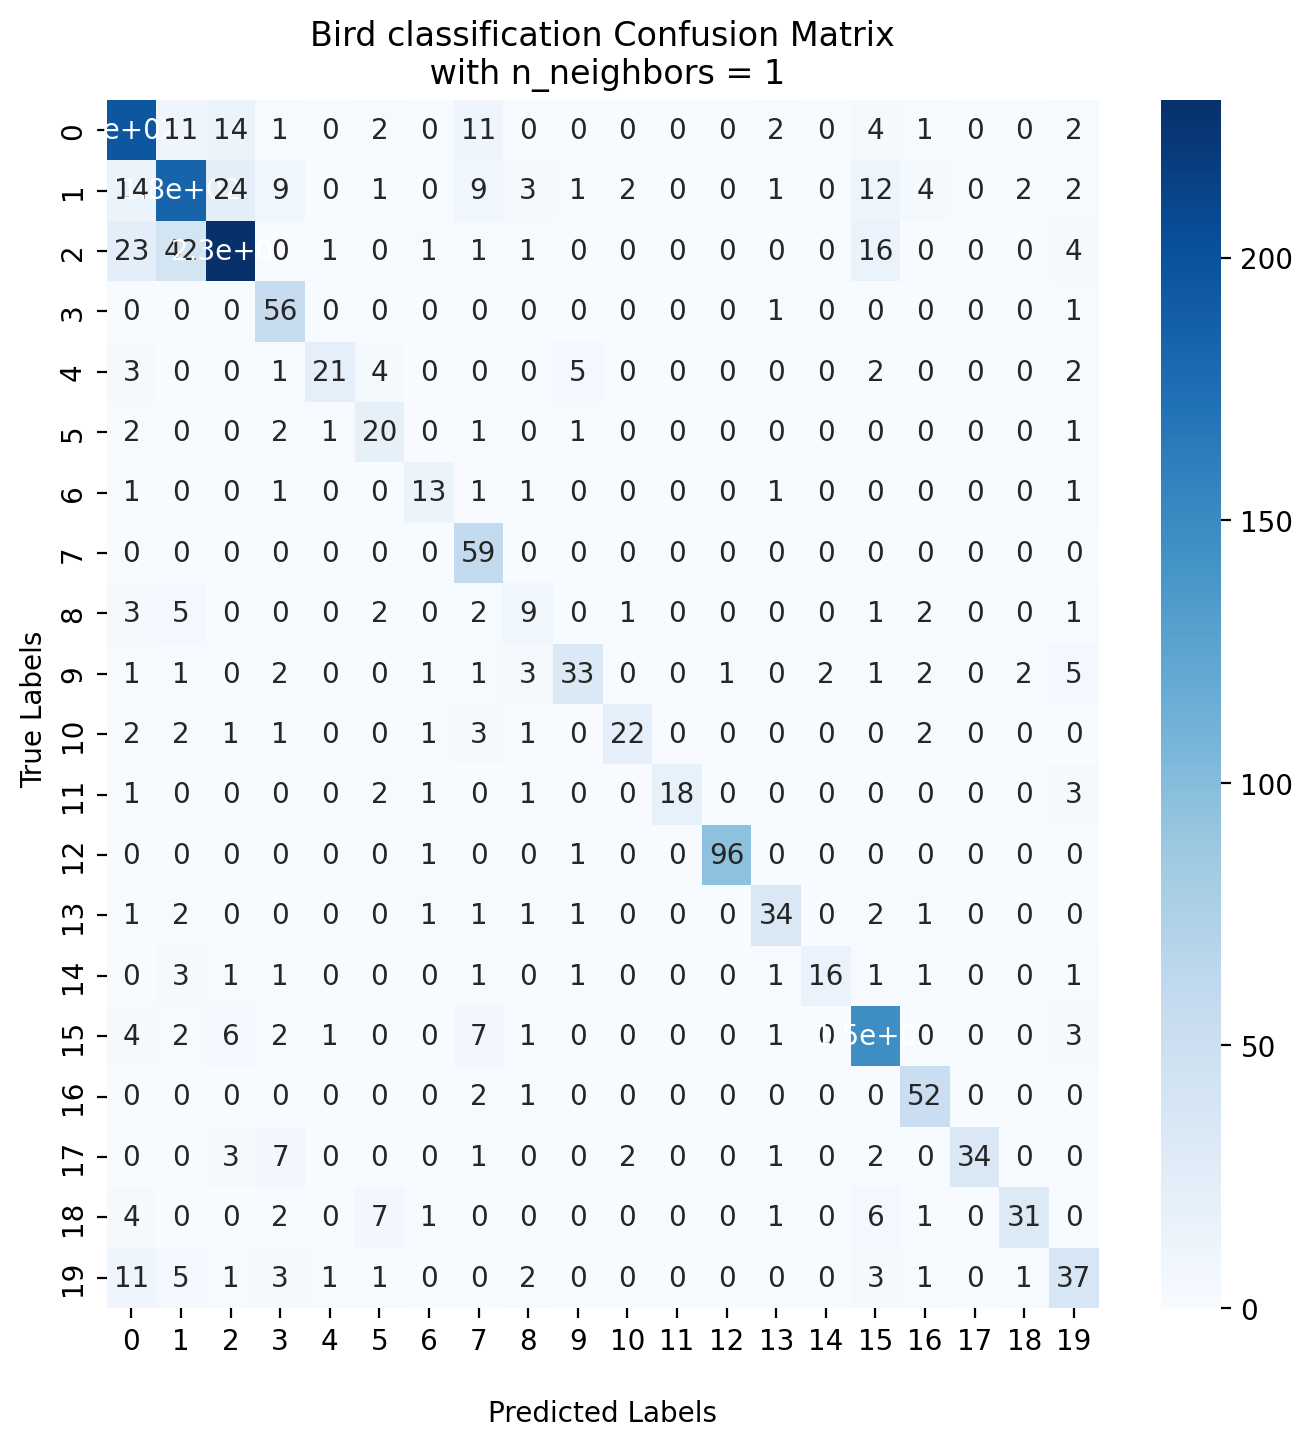

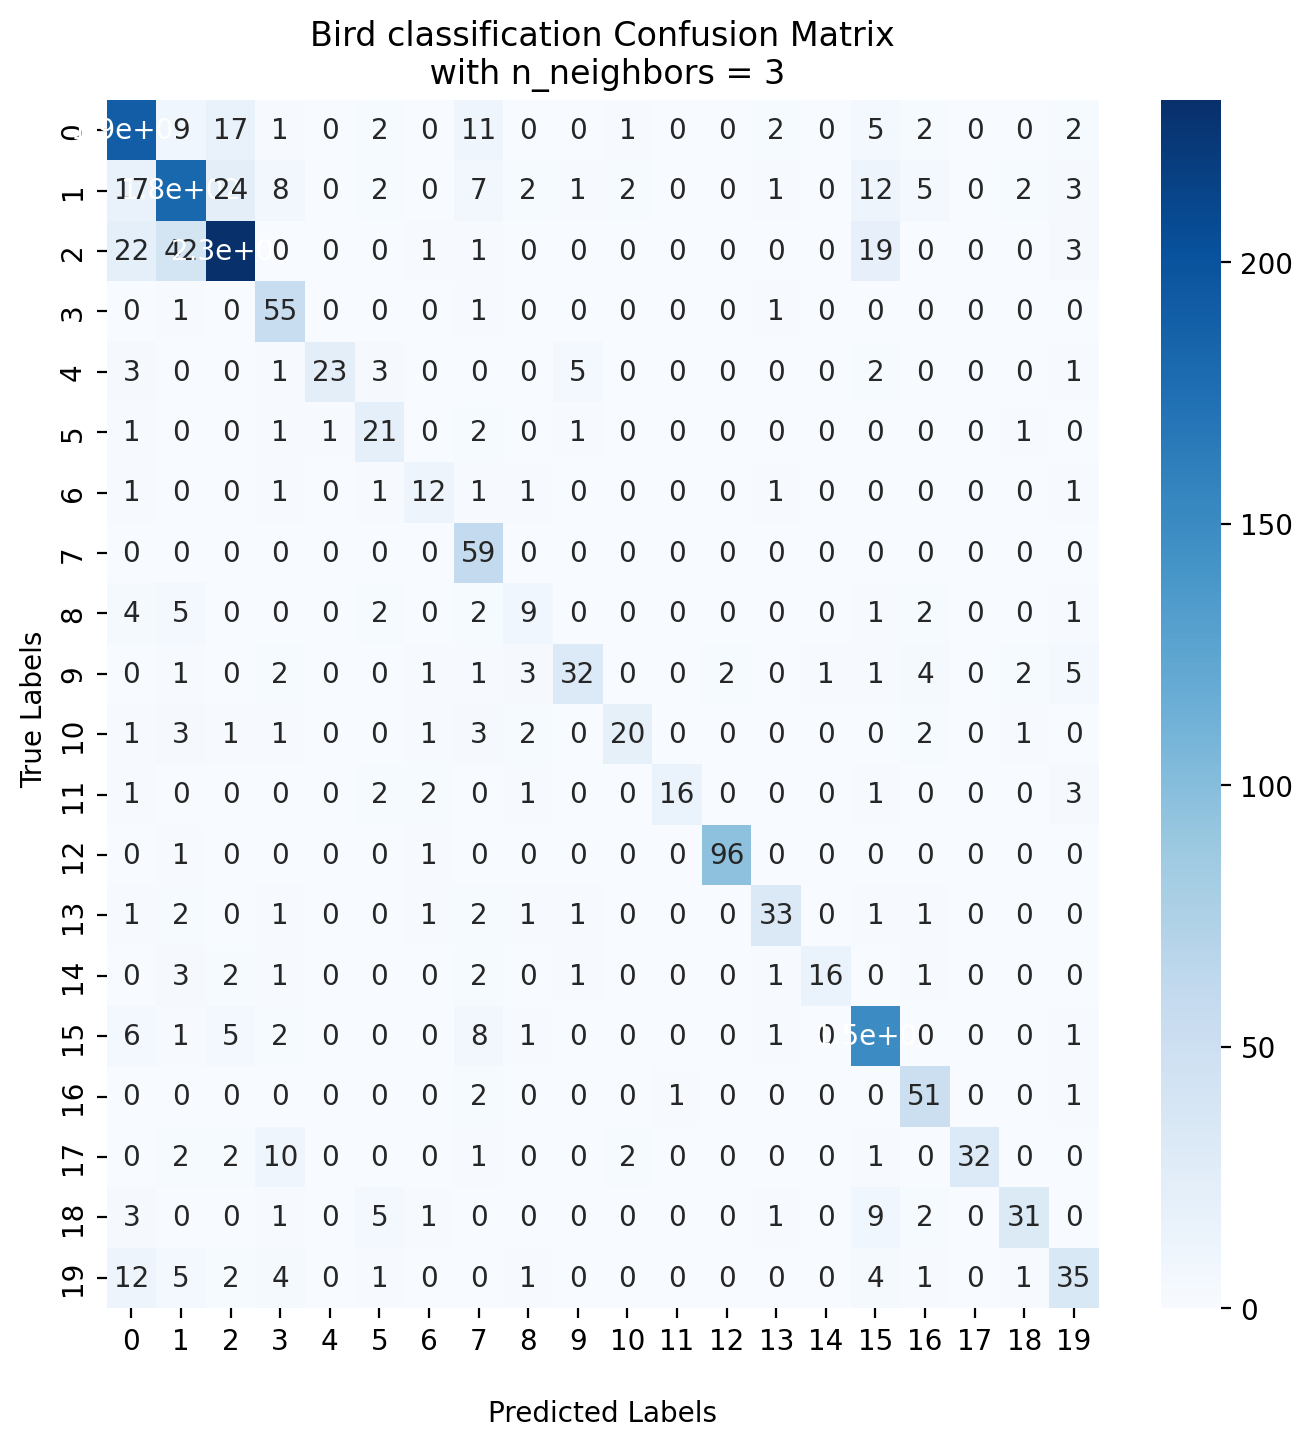

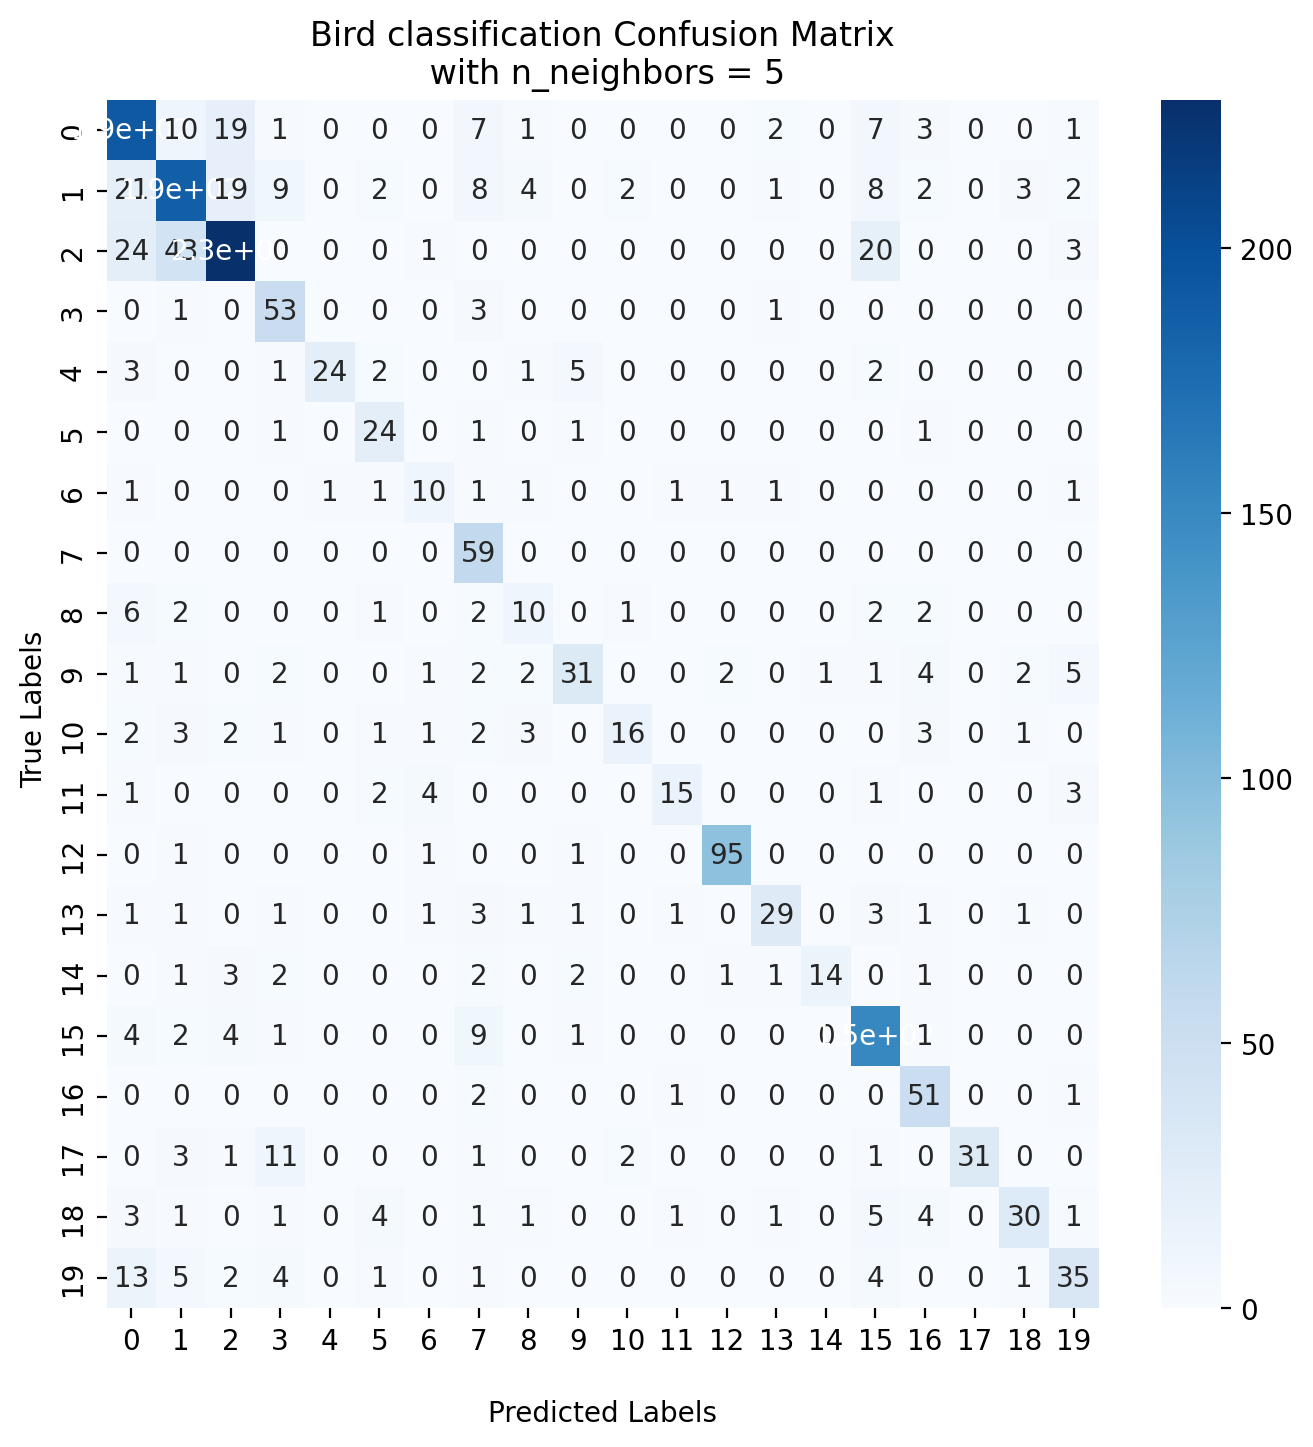

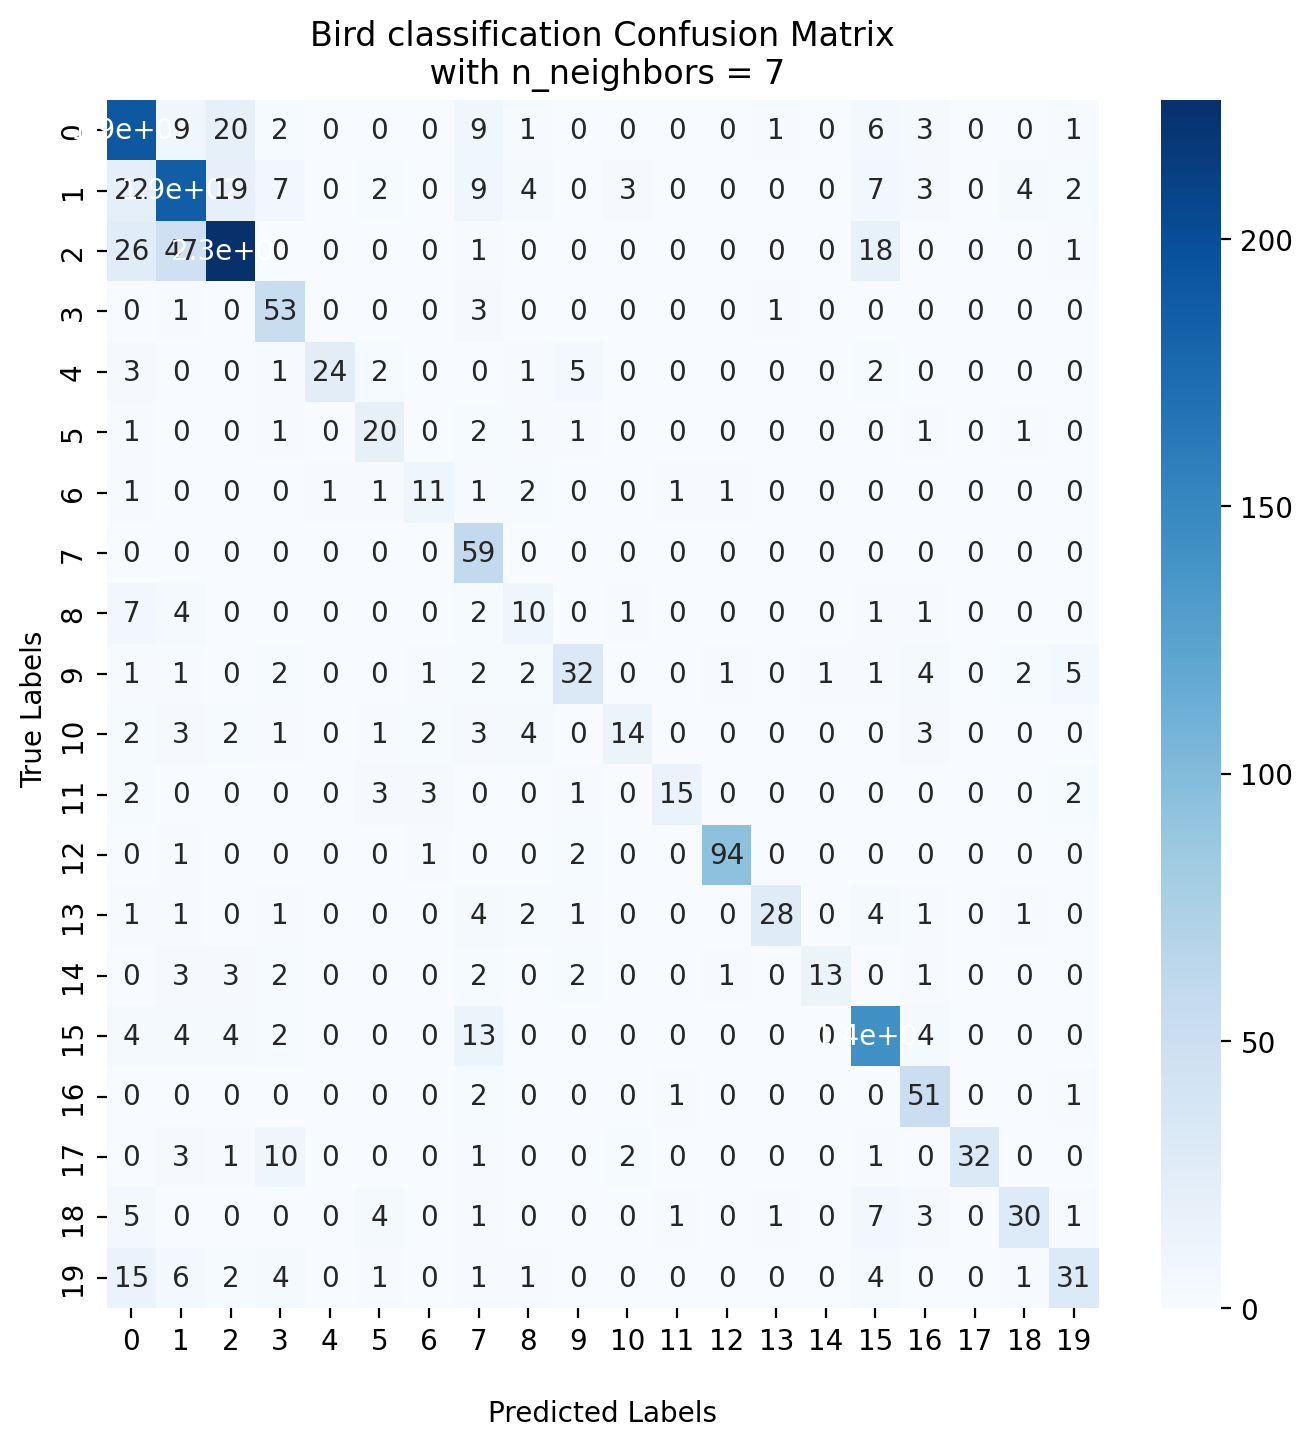

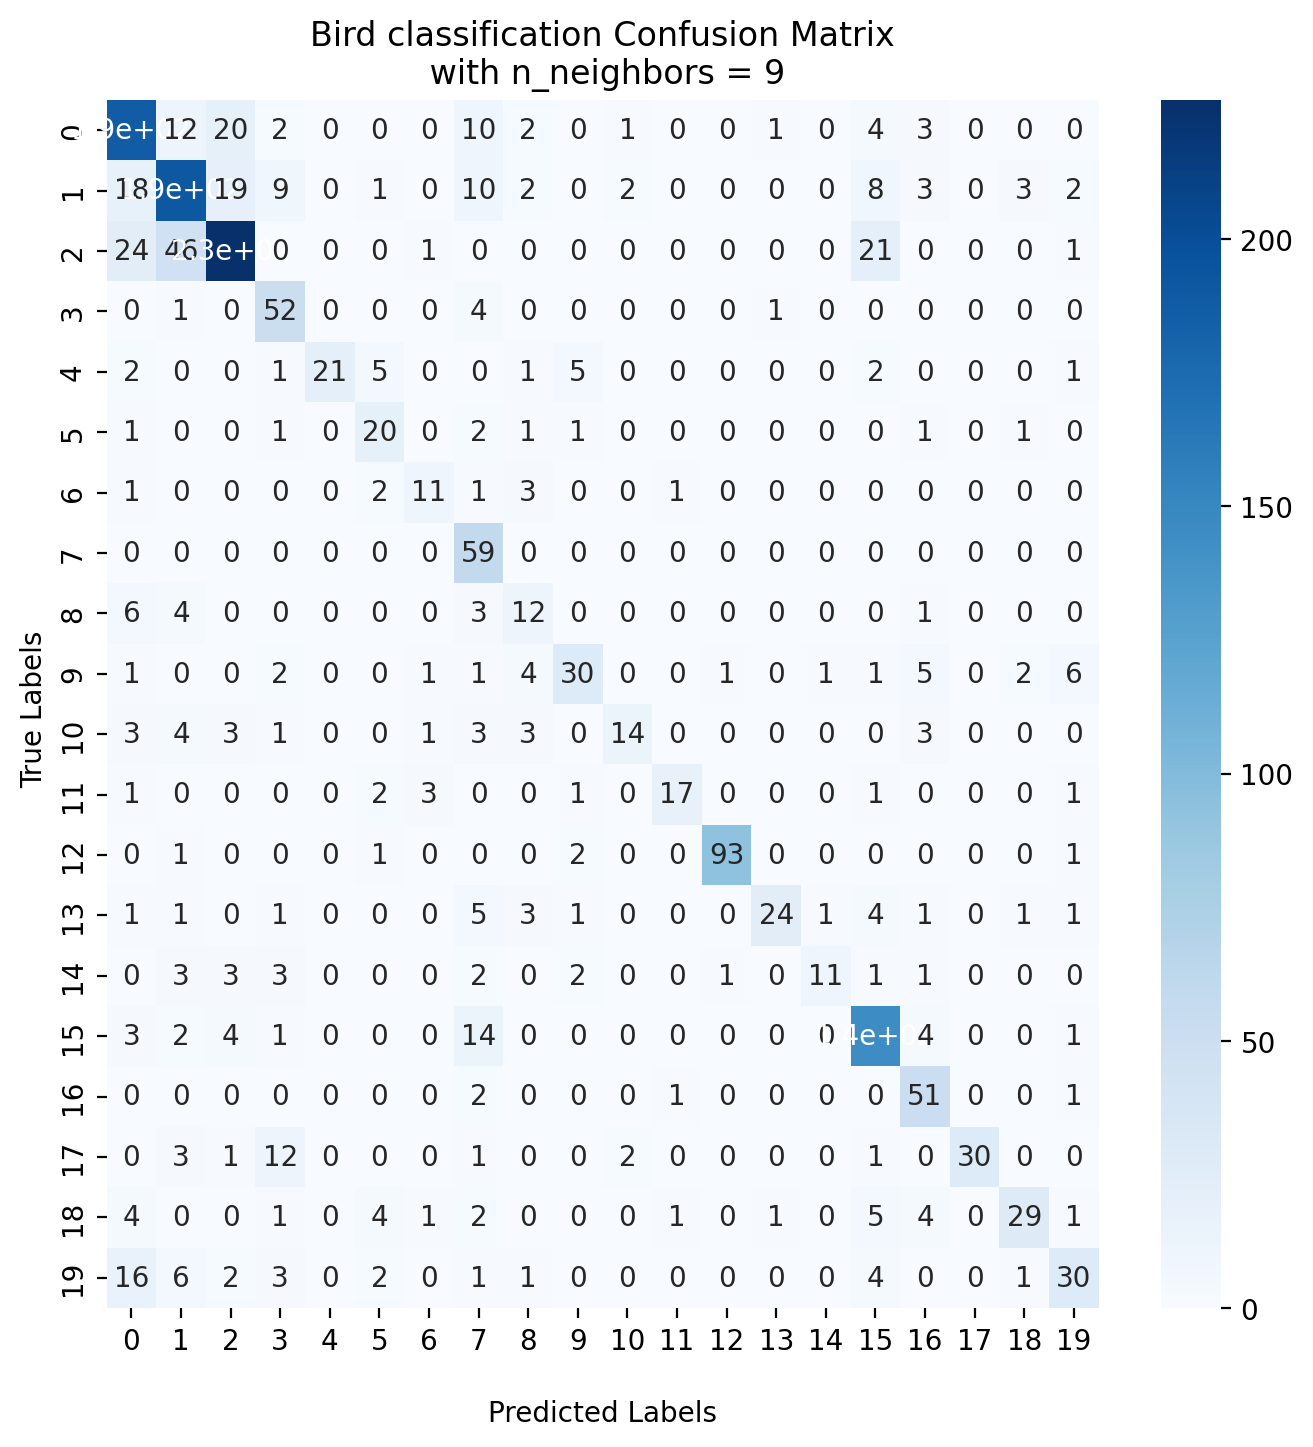

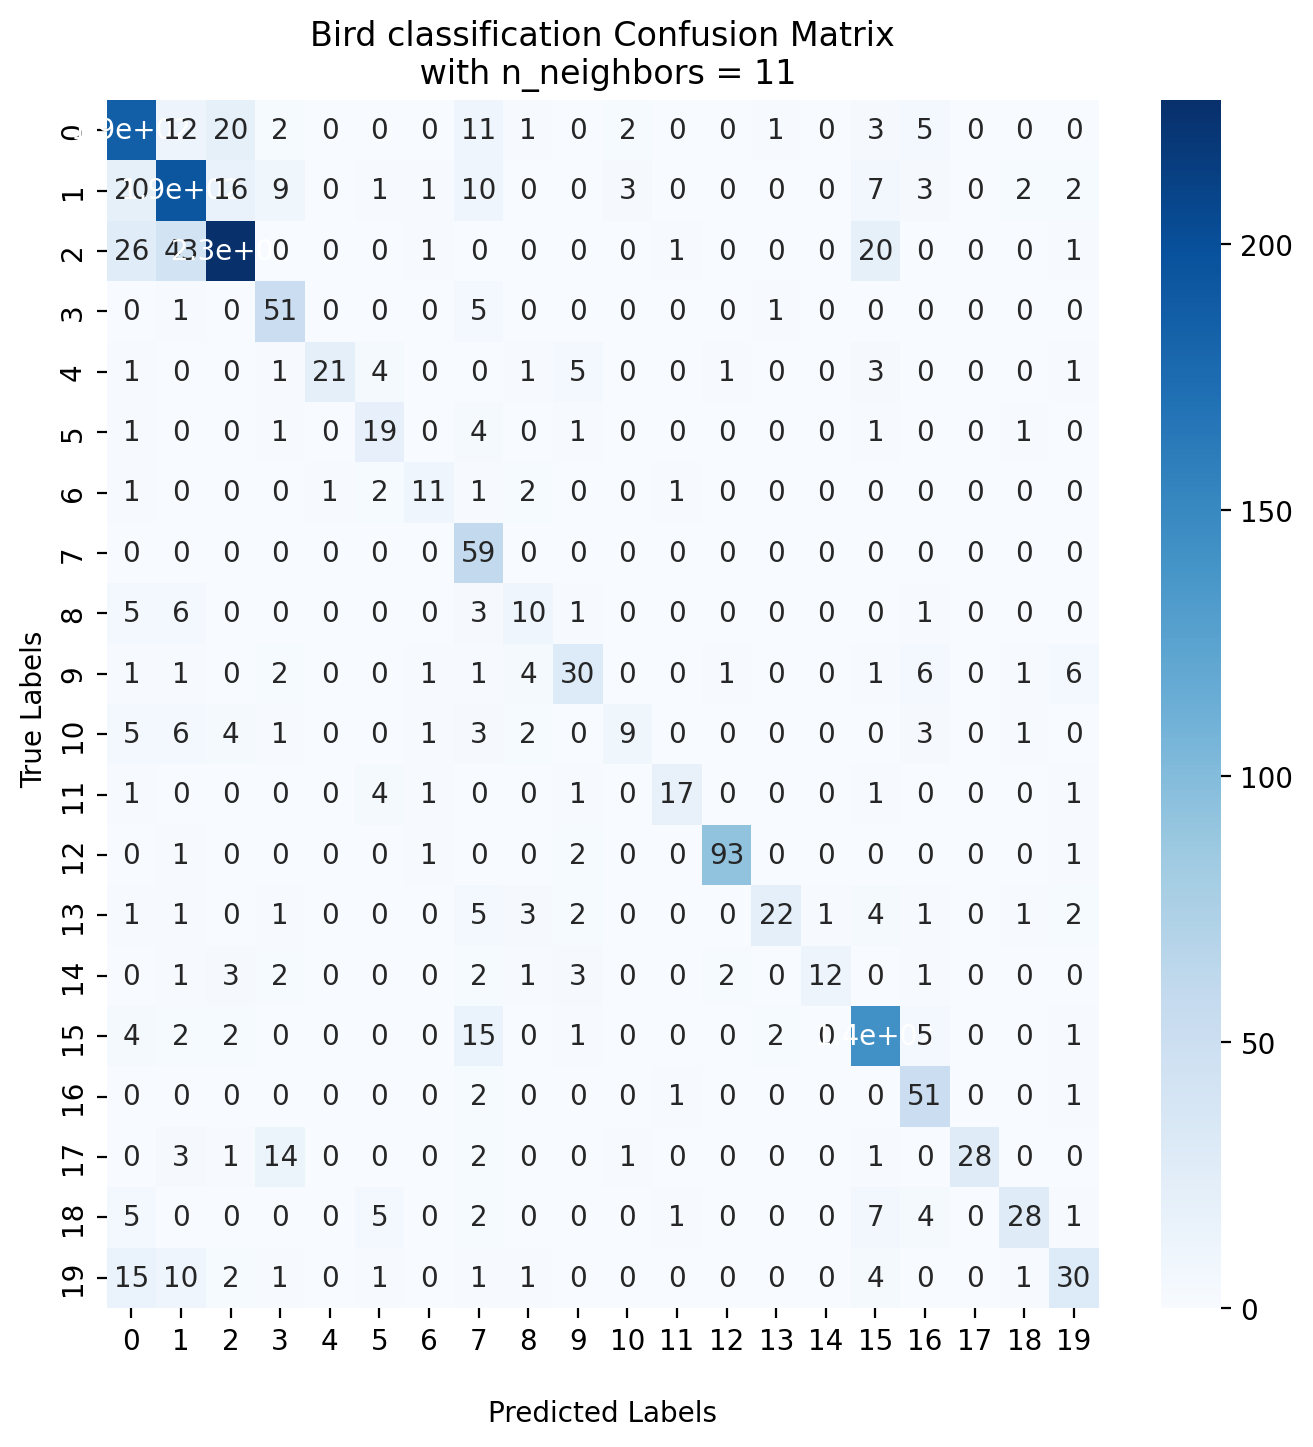

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

training_accuracy = []
validation_accuracy = []
classifiers = []
# n_neighbors from 1 to 11
neighbors_settings = [1, 3, 5, 7, 9, 11]

for neighbors in neighbors_settings:
    # building of the model
    clf = KNeighborsClassifier(n_neighbors = neighbors, weights = "distance", n_jobs = 3)
    clf.fit(X_train, y_train.ravel())
    
    y_pred = clf.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,8), dpi=200)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_title(f"Bird classification Confusion Matrix\n with n_neighbors = {neighbors}");
    ax.set_xlabel('\nPredicted Labels')
    ax.set_ylabel('True Labels ');
    # displaying the visualization of the Confusion Matrix, saving the Confusion Matrix
    plt.savefig(f"confusionmatrix {neighbors} neighbors.jpg")
    
    classifiers.append(clf)
    # recording training set accuracy
    training_accuracy.append(clf.score(X_train, y_train.ravel()))
    # recording generalization accuracy
    validation_accuracy.append(clf.score(X_val, y_val.ravel()))
    del clf

# storing n_neighbours with their accuracy in a file
# You'll have to create the files with the correct names first before running this, 
# put the text files in the folder that this ipynb file is in. 
text1 = open("training_accuracy_knn.txt", "a")
text1.write("new trial: \n")
for element in range(len(training_accuracy)):
    text1.write(f"n_neighbours = {range(1,12,2)[element]}, accuracy = {training_accuracy[element]} \n")
text1.write("end trial. \n")
text1.close()

text2 = open("validation_accuracy_knn.txt", "a")
text2.write("new trial: \n")
for element in range(len(validation_accuracy)):
    text2.write(f"n_neighbours = {range(1,12,2)[element]}, accuracy = {validation_accuracy[element]} \n")
text2.write("end trial. \n")
text2.close()

text3 = open("test_accuracy_knn.txt", "a")
test_accuracy = classifiers[np.argmax(validation_accuracy)].score(X_test, y_test)
text3.write(f"Best KNN classifier = {neighbors_settings[np.argmax(validation_accuracy)]} neighbors:\n")
text3.write(f"Test accuracy = {test_accuracy}")
text3.close()

del classifiers

[]


ValueError: x and y must have same first dimension, but have shapes (6,) and (0,)

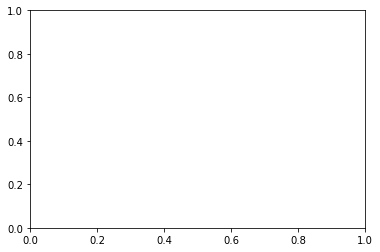

#### Logistic Regression with Cross-validation

In [ ]:
"""
from sklearn.linear_model import LogisticRegression

C_values = [0.01, 1, 100]
val_scores = []

for C_value in C_values:
    fp = open("CV_scores_LogReg.txt", "a")
    logreg = LogisticRegression(C = C_value, max_iter = 2000, n_jobs = 3, multi_class='multinomial', solver='lbfgs', penalty = 'l2')
    logreg.fit(X_train, y_train.ravel())
    train_score = logreg.score(X_train, y_train.ravel())
    val_score = logreg.score(X_val, y_val.ravel())
    val_scores.append(val_score)
    fp.write(f"C = {C_value}:\n")
    fp.write(f"Training score = {train_score}\n")
    fp.write(f"Validation score = {val_score}\n")
    np.save(f"Coefficients {C_value}.npy", logreg.coef_)
    np.save(f"Intercept {C_value}.npy", logreg.intercept_)

fp.write(f"Test score for C = {C_values[np.argmax(val_scores)]}: {logreg.score(X_test, y_test)}")
fp.close()
"""

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7e77155c-109f-4e2d-ae2d-a36577879d44' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>